In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from celluloid import Camera

MovieWriter ffmpeg unavailable; using Pillow instead.


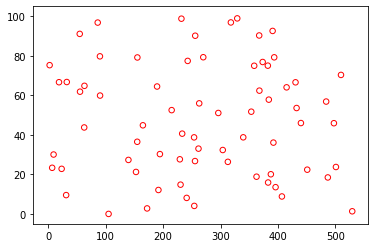

In [28]:
N = 70
seq_length = 30

box_size = [100, 530]
radius = (3 + np.random.rand(N)*1)
        
x_0 = 0 + np.random.rand(N)*box_size[1]
y_0 = 0 + np.random.rand(N)*box_size[0]

v = 4+np.random.rand(N)*2
for i in range(len(v)):
    if np.random.rand()>.2:
        v[i] /= 6

#T = 5 #sec
del_t = 1 # sec

phi = np.random.rand(N)*2*np.pi

D_t = .2 
D_r =  .5


x = np.zeros((seq_length+1, N))
y = np.zeros((seq_length+1, N))

x[0] = x_0
y[0] = y_0


camera = Camera(plt.figure())

for i in range(seq_length):
    W_x = np.random.normal(loc = 0, scale = 1, size = N)
    W_y = np.random.normal(loc = 0, scale = 1, size = N)
    W_phi = np.random.normal(loc = 0, scale = 1, size = N)

    #Updating x & y velocities
    v_x = v*np.transpose(np.cos(phi)) + np.sqrt(2*D_t)*W_x

    v_y = v*np.transpose(np.sin(phi)) + np.sqrt(2*D_t)*W_y

    #Updating rotational vel.
    v_phi = np.sqrt(2*D_r)*W_phi
    
    #Updating the x and y coordinates

    x[i+1] = x[i] +v_x*del_t
    y[i+1] = y[i] + v_y*del_t

    #Updating angle
    phi = phi + v_phi*del_t
    
    # Volume exclusion
    for z in range(25):
        
        for j in range(N):
            for k in range(N):
                if j!=k:
                    r_jk = np.sqrt(np.square(x[i+1,j]-x[i+1,k])+ np.square(y[i+1,j]-y[i+1,k]) )
                    if r_jk < (radius[j]+radius[k]):
                        dist_2b_moved = radius[j]+radius[k] - r_jk
                        
                        theta = np.arctan2([y[i+1,k], y[i+1,j]], [x[i+1,k], x[i+1,j]])[0]
                        x[i+1, j] -= dist_2b_moved/2*np.cos(theta)
                        y[i+1, j] -= dist_2b_moved/2*np.sin(theta)
                                    
                        x[i+1, k] += dist_2b_moved/2*np.cos(theta)
                        y[i+1, k] += dist_2b_moved/2*np.sin(theta)
    
    #Boundary condition
                    
    for p in range(N):
        if x[i+1,p] >= box_size[1] and y[i+1,p] >= box_size[0]:
            x[i+1,p] = box_size[1]
            y[i+1,p] = box_size[0]
            phi[p] = -3*np.pi/4
            continue

        if x[i+1,p] >= box_size[1] and y[i+1,p] <= 0:
            x[i+1,p] = box_size[1]
            y[i+1,p] = 0
            phi[p] = 3*np.pi/4
            continue

        if x[i+1,p] <= 0 and y[i+1,p] >= box_size[0]:
            x[i+1,p] = 0
            y[i+1,p] = box_size[0]
            phi[p] = -np.pi/4
            continue

        if x[i+1,p] <= 0 and y[i+1,p] <= 0:
            x[i+1,p] = 0
            y[i+1,p] = 0
            phi[p] = np.pi/4
            continue

        if x[i+1,p] > box_size[1]: 
            x[i+1,p] = box_size[1]
            phi[p] = np.pi-phi[p]

        if x[i+1,p] <= 0:
            x[i+1,p] = 0
            phi[p] = np.pi-phi[p]
        
        if y[i+1,p] > box_size[0]: 
            y[i+1,p] = box_size[0]
            phi[p] = -phi[p]

        if y[i+1,p] < 0:
            y[i+1,p] = 0
            phi[p] = -phi[p]


         
    
    plt.scatter(x[i,:], y[i,:], color="none", edgecolor="red", s=30)

    camera.snap()


anim = camera.animate(blit=True)
anim.save('scatter.gif')    

